## EDA

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np

In [2]:
# load churn dataset

df = pd.read_csv("telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


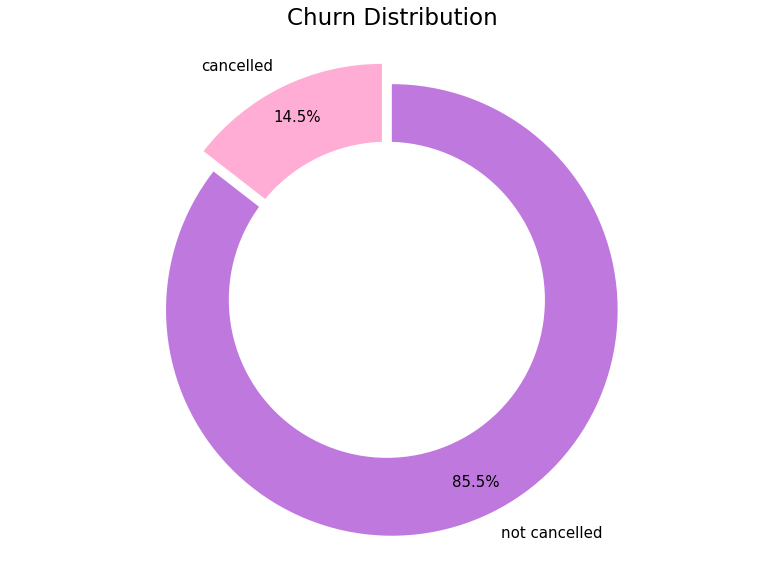

In [3]:
# Create new dataframe for better labeling of plots
import numpy as np
import matplotlib.pyplot as plt

df['churn'] = np.where(df['Churn'] == 1, 'cancelled', 'not cancelled')
df['contract renewal'] = np.where(df['ContractRenewal'] == 1, 'renewed', 'not renewed')
df['data plan'] = np.where(df['DataPlan'] == 1, 'data plan', 'no data plan')

# Create pie chart
labels = ['cancelled', 'not cancelled']
values = [(df.Churn == 1).sum(), (df.Churn == 0).sum()]
colors = ["#ffadd5", "#bf78de"]
explode = (0.05,0.05)
textprops = {"fontsize":15}

fig1, ax1 = plt.subplots(figsize=(11, 8))
ax1.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,
        pctdistance=0.85, explode = explode, textprops = textprops)

#draw circle
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.suptitle('Churn Distribution', fontsize=23)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.savefig("pieplot_churndist.jpg")
plt.show()

In [4]:
## EDA

In [5]:
# checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             3333 non-null   int64  
 1   AccountWeeks      3333 non-null   int64  
 2   ContractRenewal   3333 non-null   int64  
 3   DataPlan          3333 non-null   int64  
 4   DataUsage         3333 non-null   float64
 5   CustServCalls     3333 non-null   int64  
 6   DayMins           3333 non-null   float64
 7   DayCalls          3333 non-null   int64  
 8   MonthlyCharge     3333 non-null   float64
 9   OverageFee        3333 non-null   float64
 10  RoamMins          3333 non-null   float64
 11  churn             3333 non-null   object 
 12  contract renewal  3333 non-null   object 
 13  data plan         3333 non-null   object 
dtypes: float64(5), int64(6), object(3)
memory usage: 364.7+ KB


In [6]:
# check statistics
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


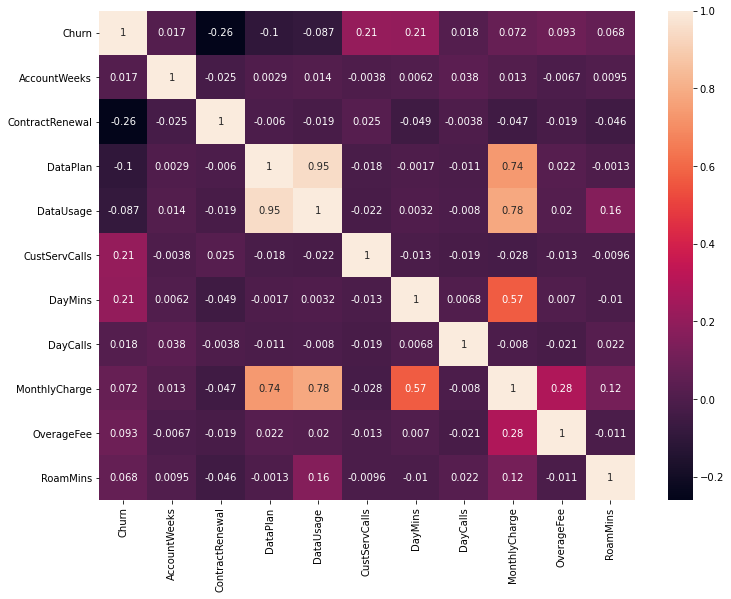

In [7]:
# heatmap correlation
plt.figure(figsize=(12,9))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig("heatmap.jpg")
plt.show()

Terdapat beberapa korelasi tinggi di antara 2 variabel di antaranya:
1. MonthlyCharge dengan DataPlan
2. MonthlyCharge dengan DataUsage
3. DataUsage dengan DataPlan
4. MonthlyCharge dengan DayMins

In [8]:
# Create labelling for 3 columns: Churn, ContractRenewal, DataPlan
df['Churn'] = np.where(df['Churn'] == 1, 'cancelled', 'not cancelled')
df['ContractRenewal'] = np.where(df['ContractRenewal'] == 1, 'renewed', 'not renewed')
df['DataPlan'] = np.where(df['DataPlan'] == 1, 'data plan', 'no data plan')

In [9]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,churn,contract renewal,data plan
0,not cancelled,128,renewed,data plan,2.70,1,265.1,110,89.0,9.87,10.0,not cancelled,renewed,data plan
1,not cancelled,107,renewed,data plan,3.70,1,161.6,123,82.0,9.78,13.7,not cancelled,renewed,data plan
2,not cancelled,137,renewed,no data plan,0.00,0,243.4,114,52.0,6.06,12.2,not cancelled,renewed,no data plan
3,not cancelled,84,not renewed,no data plan,0.00,2,299.4,71,57.0,3.10,6.6,not cancelled,not renewed,no data plan
4,not cancelled,75,not renewed,no data plan,0.00,3,166.7,113,41.0,7.42,10.1,not cancelled,not renewed,no data plan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,not cancelled,192,renewed,data plan,2.67,2,156.2,77,71.7,10.78,9.9,not cancelled,renewed,data plan
3329,not cancelled,68,renewed,no data plan,0.34,3,231.1,57,56.4,7.67,9.6,not cancelled,renewed,no data plan
3330,not cancelled,28,renewed,no data plan,0.00,2,180.8,109,56.0,14.44,14.1,not cancelled,renewed,no data plan
3331,not cancelled,184,not renewed,no data plan,0.00,2,213.8,105,50.0,7.98,5.0,not cancelled,not renewed,no data plan


In [13]:
for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
         print(f'n: {n}, x: {x}, proportion: {proportion}')

n: 0, x: not renewed, proportion: 137
n: 0, x: not renewed, proportion: 186
n: 1, x: renewed, proportion: 346
n: 1, x: renewed, proportion: 2664


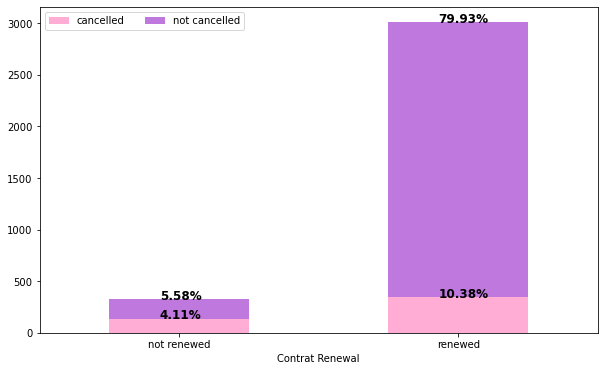

In [11]:
cross_tab_prop = pd.crosstab(index=df['ContractRenewal'],
                        columns=df['Churn'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=["#ffadd5", "#bf78de"], 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Contrat Renewal")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (val, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.07,
                 y=y_loc,
                 s=f'{np.round(val * 100/3333, 2)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        plt.xticks(rotation=0)

plt.savefig("countplot_contractvschurn.jpg")
plt.show()

In [14]:
# showing percentage of ContractRenewal and Churn
crosstb1 = pd.crosstab(index = df['ContractRenewal'],  \
                      columns = df['Churn'] , \
                      normalize=True, margins = True, \
                      margins_name= "Percentage") *100
crosstb1.astype(str).apply(lambda x:x + '%')
crosstb1

Churn,cancelled,not cancelled,Percentage
ContractRenewal,,,
not renewed,4.110411,5.580558,9.690969
renewed,10.381038,79.927993,90.309031
Percentage,14.491449,85.508551,100.000000


In [15]:
# showing percentage of ContractRenewal and Churn
cross_tab_prop.apply(lambda x: x*100/x.sum(), axis = 1)

Churn,cancelled,not cancelled
ContractRenewal,,
not renewed,42.414861,57.585139
renewed,11.495017,88.504983


Insight:
- Dapat diketahui bahwa customer cenderung Churn ketika mereka tidak memperbarui kontrak dengan persentase 42% dari total customer yang tidak memperbarui kontrak.
- Hampir 80% customer yang tidak churn memperbarui kontrak.

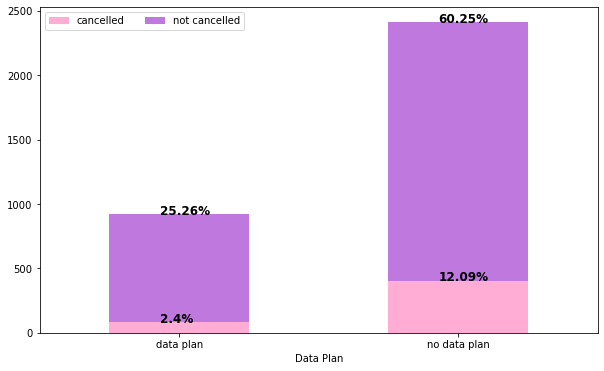

In [16]:
# Create barchart for 'DataPlan'
cross_tab_prop = pd.crosstab(index=df['DataPlan'],
                        columns=df['Churn'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=["#ffadd5", "#bf78de"], 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Data Plan")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (val, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.07,
                 y=y_loc,
                 s=f'{np.round(val * 100/3333, 2)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        plt.xticks(rotation=0)

plt.savefig("countplot_dataplanvschurn.jpg")
plt.show()

In [17]:
# showing percentage of DataPlan and Churn
crosstb2 = pd.crosstab(index = df['DataPlan'],  \
                      columns = df['Churn'] , \
                      normalize=True, margins = True, \
                      margins_name= "Percentage") *100
crosstb2.astype(str).apply(lambda x:x + '%')
crosstb2

Churn,cancelled,not cancelled,Percentage
DataPlan,,,
data plan,2.400240,25.262526,27.662766
no data plan,12.091209,60.246025,72.337234
Percentage,14.491449,85.508551,100.000000


In [18]:
# showing percentage of DataPlan and Churn
cross_tab_prop.apply(lambda x: x*100/x.sum(), axis = 1)

Churn,cancelled,not cancelled
DataPlan,,
data plan,8.676790,91.323210
no data plan,16.715056,83.284944


Insight:
- Sekitar 72% dari total customer tidak memiliki data plan, dan 16% di antaranya adalah customer churn.
- Dari total semua customer, 12% customer yang churn tidak memiliki data plan. Persentase ini terlihat cukup signifikan dibandingkan dengan persentase customer churn yang memiliki data plan yaitu hanya 2% dari total customer keseluruhan.

Dari deskripsi statistik sebelumnya, diketahui bahwa nilai minimum dari kolom DataUsage adalah 0 namun di sisi lain nilai minimum dari MonthlyCharge bukanlah 0. Jadi dapat diketahui bahwa ada customer yang belum menggunakan Data namun sudah membayar biaya bulanan.

In [19]:
# Checking value in DataUsage column
datausage = df["DataUsage"]
data_use = df[datausage > 0]
data_use

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,churn,contract renewal,data plan
0,not cancelled,128,renewed,data plan,2.70,1,265.1,110,89.0,9.87,10.0,not cancelled,renewed,data plan
1,not cancelled,107,renewed,data plan,3.70,1,161.6,123,82.0,9.78,13.7,not cancelled,renewed,data plan
6,not cancelled,121,renewed,data plan,2.03,3,218.2,88,87.3,17.43,7.5,not cancelled,renewed,data plan
8,not cancelled,117,renewed,no data plan,0.19,1,184.5,97,63.9,17.58,8.7,not cancelled,renewed,no data plan
9,not cancelled,141,not renewed,data plan,3.02,0,258.6,84,93.2,11.10,11.2,not cancelled,not renewed,data plan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,not cancelled,78,renewed,no data plan,0.23,2,193.4,99,45.3,5.85,9.3,not cancelled,renewed,no data plan
3326,not cancelled,96,renewed,no data plan,0.36,1,106.6,128,46.6,14.24,14.9,not cancelled,renewed,no data plan
3328,not cancelled,192,renewed,data plan,2.67,2,156.2,77,71.7,10.78,9.9,not cancelled,renewed,data plan
3329,not cancelled,68,renewed,no data plan,0.34,3,231.1,57,56.4,7.67,9.6,not cancelled,renewed,no data plan


In [20]:
# Checking value in DataUsage column
datausage0 = df["DataUsage"]
data_use0 = df[datausage == 0]
data_use0

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,churn,contract renewal,data plan
2,not cancelled,137,renewed,no data plan,0.0,0,243.4,114,52.0,6.06,12.2,not cancelled,renewed,no data plan
3,not cancelled,84,not renewed,no data plan,0.0,2,299.4,71,57.0,3.10,6.6,not cancelled,not renewed,no data plan
4,not cancelled,75,not renewed,no data plan,0.0,3,166.7,113,41.0,7.42,10.1,not cancelled,not renewed,no data plan
5,not cancelled,118,not renewed,no data plan,0.0,0,223.4,98,57.0,11.03,6.3,not cancelled,not renewed,no data plan
7,not cancelled,147,not renewed,no data plan,0.0,0,157.0,79,36.0,5.16,7.1,not cancelled,not renewed,no data plan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,cancelled,62,renewed,no data plan,0.0,4,321.1,105,78.0,13.28,11.5,cancelled,renewed,no data plan
3324,not cancelled,159,renewed,no data plan,0.0,1,169.8,114,46.0,9.89,11.6,not cancelled,renewed,no data plan
3327,not cancelled,79,renewed,no data plan,0.0,2,134.7,98,40.0,9.49,11.8,not cancelled,renewed,no data plan
3330,not cancelled,28,renewed,no data plan,0.0,2,180.8,109,56.0,14.44,14.1,not cancelled,renewed,no data plan


In [21]:
# create new column
df['DataUse'] = np.where(df['DataUsage'] == 0, 'no data usage', 'data usage')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,churn,contract renewal,data plan,DataUse
0,not cancelled,128,renewed,data plan,2.70,1,265.1,110,89.0,9.87,10.0,not cancelled,renewed,data plan,data usage
1,not cancelled,107,renewed,data plan,3.70,1,161.6,123,82.0,9.78,13.7,not cancelled,renewed,data plan,data usage
2,not cancelled,137,renewed,no data plan,0.00,0,243.4,114,52.0,6.06,12.2,not cancelled,renewed,no data plan,no data usage
3,not cancelled,84,not renewed,no data plan,0.00,2,299.4,71,57.0,3.10,6.6,not cancelled,not renewed,no data plan,no data usage
4,not cancelled,75,not renewed,no data plan,0.00,3,166.7,113,41.0,7.42,10.1,not cancelled,not renewed,no data plan,no data usage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,not cancelled,192,renewed,data plan,2.67,2,156.2,77,71.7,10.78,9.9,not cancelled,renewed,data plan,data usage
3329,not cancelled,68,renewed,no data plan,0.34,3,231.1,57,56.4,7.67,9.6,not cancelled,renewed,no data plan,data usage
3330,not cancelled,28,renewed,no data plan,0.00,2,180.8,109,56.0,14.44,14.1,not cancelled,renewed,no data plan,no data usage
3331,not cancelled,184,not renewed,no data plan,0.00,2,213.8,105,50.0,7.98,5.0,not cancelled,not renewed,no data plan,no data usage


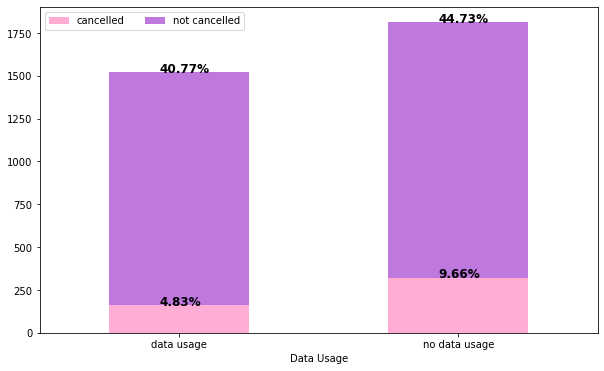

In [22]:
# Create barchart for 'DataUsage'
cross_tab_prop = pd.crosstab(index=df['DataUse'],
                        columns=df['Churn'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=["#ffadd5", "#bf78de"], 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Data Usage")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (val, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.07,
                 y=y_loc,
                 s=f'{np.round(val * 100/3333, 2)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        plt.xticks(rotation=0)

plt.savefig("countplot_datausevschurn.jpg")
plt.show()

In [23]:
# showing percentage of DataUsage and Churn
crosstb3 = pd.crosstab(index = df['DataUse'],  \
                      columns = df['Churn'] , \
                      normalize=True, margins = True, \
                      margins_name= "Percentage") *100
crosstb3.astype(str).apply(lambda x:x + '%')
crosstb3

Churn,cancelled,not cancelled,Percentage
DataUse,,,
data usage,4.830483,40.774077,45.60456
no data usage,9.660966,44.734473,54.39544
Percentage,14.491449,85.508551,100.00000


In [24]:
# showing percentage of DataUsage and Churn
cross_tab_prop.apply(lambda x: x*100/x.sum(), axis = 1)

Churn,cancelled,not cancelled
DataUse,,
data usage,10.592105,89.407895
no data usage,17.760618,82.239382


Insight:
- Dari keseluruhan customer yang churn, lebih banyak dari mereka yang tidak memiliki data usage.
- Lebih banyak customer yang tidak memiliki data usage yaitu dengan persentase 54%.

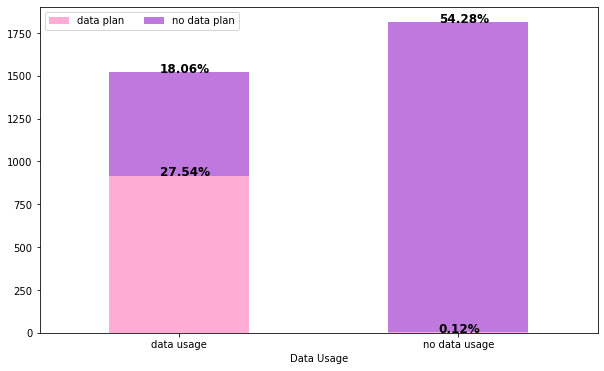

In [25]:
# Create barchart for 'DataUsage vs DataPlan'
cross_tab_prop = pd.crosstab(index=df['DataUse'],
                        columns=df['DataPlan'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=["#ffadd5", "#bf78de"], 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Data Usage")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (val, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.07,
                 y=y_loc,
                 s=f'{np.round(val * 100/3333, 2)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        plt.xticks(rotation=0)

plt.savefig("countplot_datausevsdataplan.jpg")
plt.show()

In [26]:
# showing percentage of DataUsage and DataPlan
crosstb4 = pd.crosstab(index = df['DataUse'],  \
                      columns = df['DataPlan'] , \
                      normalize=True, margins = True, \
                      margins_name= "Percentage") *100
crosstb4.astype(str).apply(lambda x:x + '%')
crosstb4

DataPlan,data plan,no data plan,Percentage
DataUse,,,
data usage,27.542754,18.061806,45.60456
no data usage,0.120012,54.275428,54.39544
Percentage,27.662766,72.337234,100.00000


In [27]:
# showing percentage of DataUsage and DataPlan
cross_tab_prop.apply(lambda x: x*100/x.sum(), axis = 1)

DataPlan,data plan,no data plan
DataUse,,
data usage,60.394737,39.605263
no data usage,0.220629,99.779371


Insight:
- Hampir 100% customer yang tidak memiliki data usage juga tidak memiliki data plan, sebaliknya banyak customer yang memiliki datausage juga memiliki dataplan.
- Sebelumnya telah diketahui bahwa customer yang tidak memiliki dataplan memiliki kecenderungan untuk churn lebih besar dibanding yang memiliki dataplan, maka customer yang tidak memiliki data usage juga perlu ditandai sebagai customer yang memiliki kecenderungan untuk churn dibanding yang memiliki data usage.

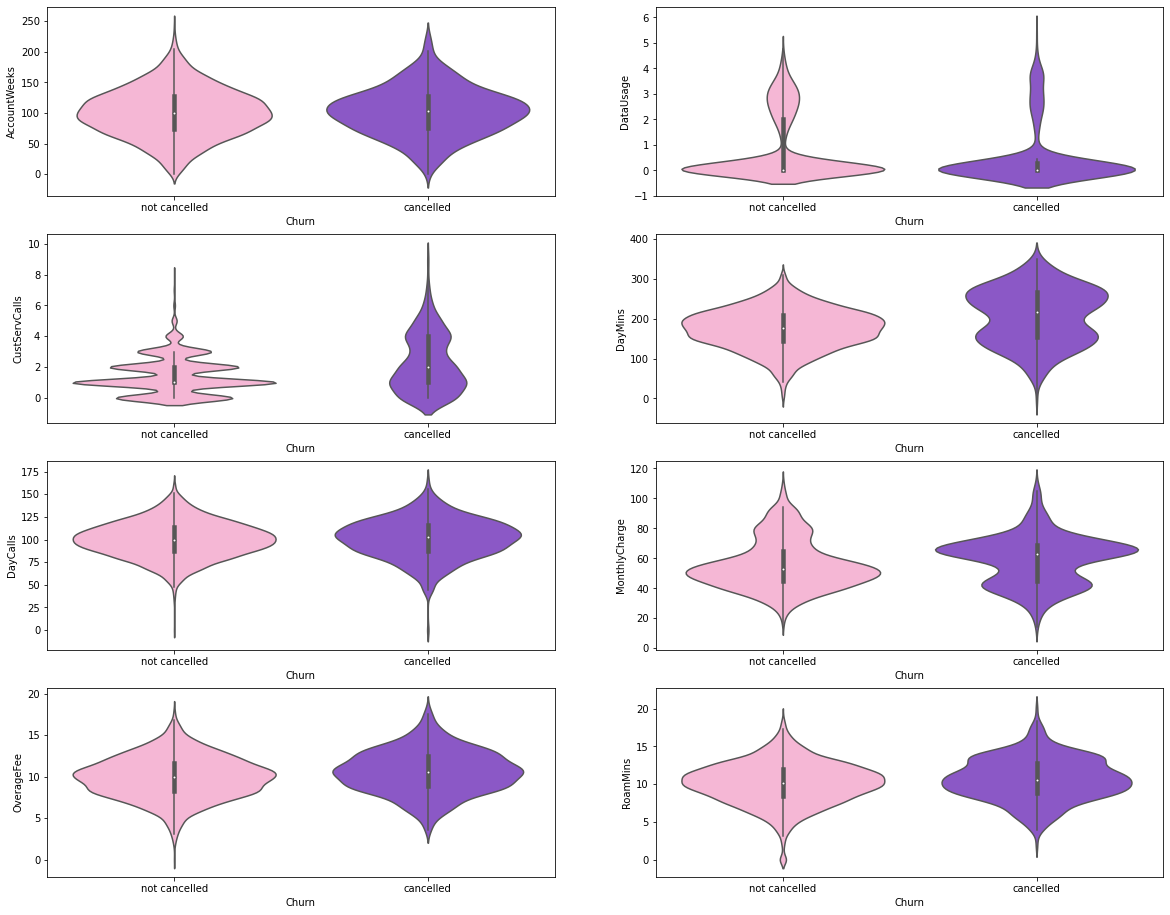

In [28]:
# Violinplot

# Set up figure
fig = plt.figure(figsize = (20,16))

# plotting
cols = df[['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
               'RoamMins']]
for i, v in enumerate(cols):
    axes = fig.add_subplot(4, 2, i+1)
    sns.violinplot(x = 'Churn', y = v, data = df, ax = axes, palette=["#ffadd5", "#8a45d9"])
    
plt.savefig("violinplot_all.jpg")

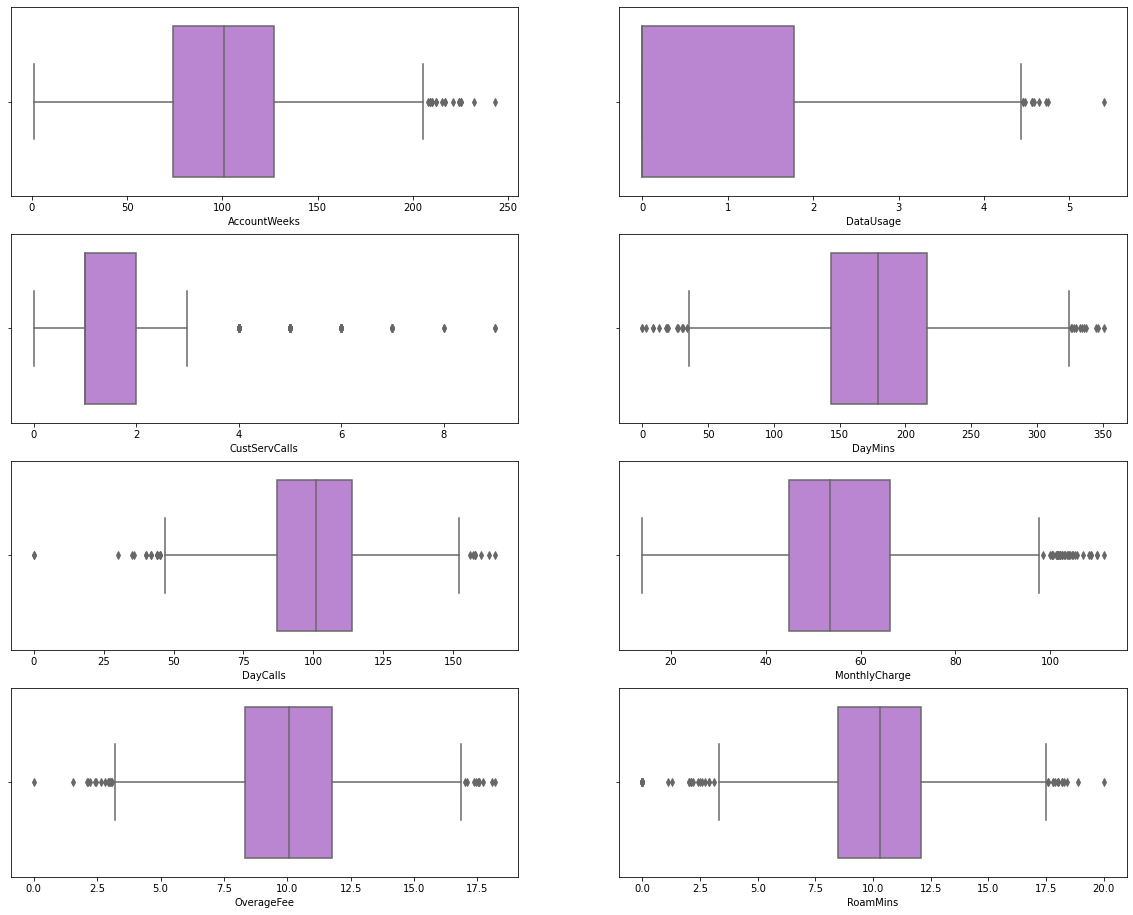

In [29]:
# Boxplot

# Set up figure
fig = plt.figure(figsize = (20,16))

# plotting
cols = df[['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
               'RoamMins']]
for i, v in enumerate(cols):
    axes = fig.add_subplot(4, 2, i+1)
    sns.boxplot(x = v, data = df, ax = axes, color='#bf78de')
        
plt.savefig("boxplot_all.jpg")

Insight:
- Dilihat dari violin plot terdapat 4 fitur yang memiliki distribusi data yang tidak normal yaitu: DataUsage, CustServCalls, DayMins, dan MonthlyCharge
- Dari boxplot dapat diketahui bahwa fitur-fitur yang bersifat numerik pada dataset kesemuanya memiliki outlier.

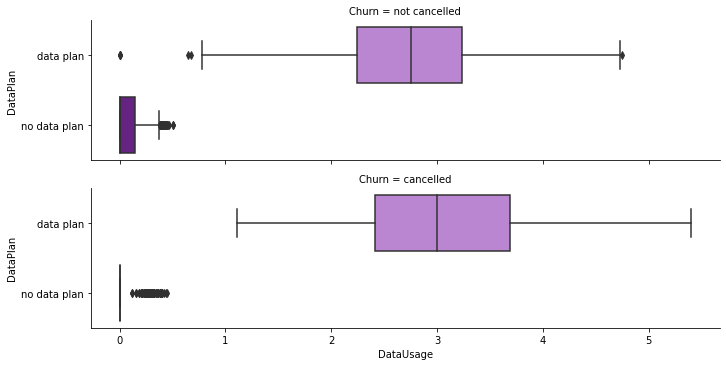

In [30]:
# Boxplot: DataPlan & DataUsage & Churn

sns.catplot(x = 'DataUsage', y = 'DataPlan', row = 'Churn',
            kind = 'box', orient = 'h', height = 2.5, aspect = 4,
            data = df, palette=['#bf78de', '#6b1491'])

plt.savefig("boxplot_datausevsdataplanvschurn.jpg")

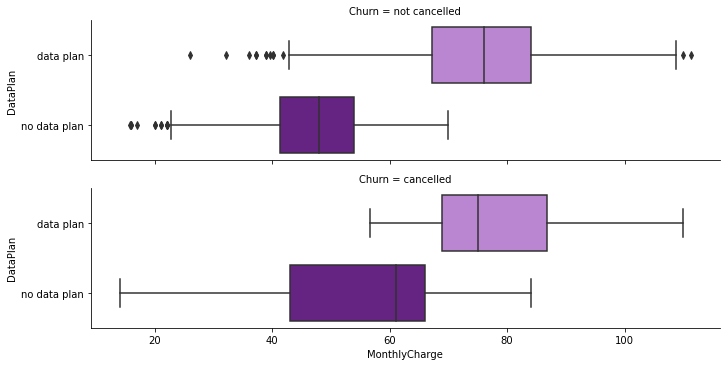

In [31]:
# Boxplot: MonthlyCharge & DataPlan & Churn

sns.catplot(x = 'MonthlyCharge', y = 'DataPlan', row = 'Churn',
            kind = 'box', orient = 'h', height = 2.5, aspect = 4,
            data = df, palette=['#bf78de', '#6b1491'])

plt.savefig("boxplot_monthlychargevsdataplanvschurn.jpg")

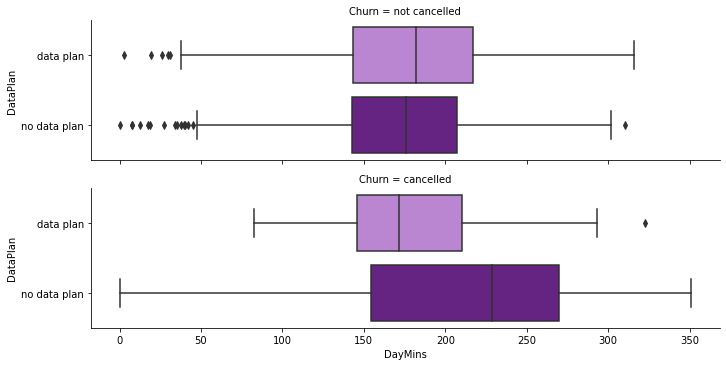

In [32]:
# Boxplot: DayMins & DataPlan & Churn

sns.catplot(x = 'DayMins', y = 'DataPlan', row = 'Churn',
            kind = 'box', orient = 'h', height = 2.5, aspect = 4,
            data = df, palette=['#bf78de', '#6b1491'])

plt.savefig("boxplot_dayminsvsdataplanvschurn.jpg")

In [33]:
# create function for outlier detection
def outlier(data, col):
    
    global df_out
    
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3-q1
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr

    df_1 = df.loc[((data[col]<fence_low) | (data[col]>fence_high))]
    df_out = pd.DataFrame(df_1)
    return df_out

In [34]:
outlier(df, "MonthlyCharge")

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,churn,contract renewal,data plan,DataUse
115,cancelled,36,not renewed,data plan,5.40,0,196.8,89,110.0,12.75,20.0,cancelled,not renewed,data plan,data usage
198,cancelled,131,not renewed,data plan,3.73,4,292.9,101,104.3,9.99,13.8,cancelled,not renewed,data plan,data usage
228,not cancelled,104,renewed,data plan,3.59,4,280.2,136,102.9,11.03,13.3,not cancelled,renewed,data plan,data usage
469,not cancelled,41,renewed,data plan,4.64,2,194.4,63,101.4,12.75,17.2,not cancelled,renewed,data plan,data usage
514,cancelled,60,not renewed,data plan,3.78,0,265.9,113,101.8,10.79,14.0,cancelled,not renewed,data plan,data usage
542,cancelled,152,not renewed,data plan,3.83,9,237.5,120,100.3,12.67,14.2,cancelled,not renewed,data plan,data usage
569,cancelled,133,not renewed,data plan,4.16,2,221.1,137,102.6,13.25,15.4,cancelled,not renewed,data plan,data usage
575,not cancelled,114,renewed,data plan,3.83,1,309.9,90,108.3,10.02,14.2,not cancelled,renewed,data plan,data usage
579,not cancelled,72,renewed,data plan,4.46,1,186.7,108,105.6,16.75,16.5,not cancelled,renewed,data plan,data usage
646,not cancelled,153,renewed,data plan,4.16,0,235.6,74,101.6,11.40,15.4,not cancelled,renewed,data plan,data usage


In [ ]:
outlier(df, "DataUsage")

In [ ]:
outlier(df, "DayMins")

In [ ]:
outlier(df, "OverageFee")

In [ ]:
outlier(df, "AccountWeeks")

In [ ]:
outlier(df, "RoamMins")

In [ ]:
outlier(df, "CustServCalls")

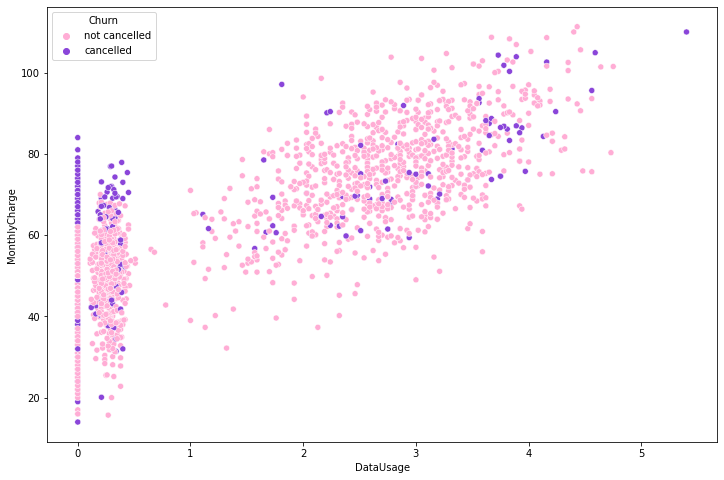

In [35]:
# Scatterplot: DataUsage & MonthlyCharge & Churn

# Create scatterplot
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'DataUsage', y = 'MonthlyCharge', hue = 'Churn', palette=["#ffadd5", "#8a45d9"])

plt.savefig("scatterplot_datausevsmonthlycharge.jpg")

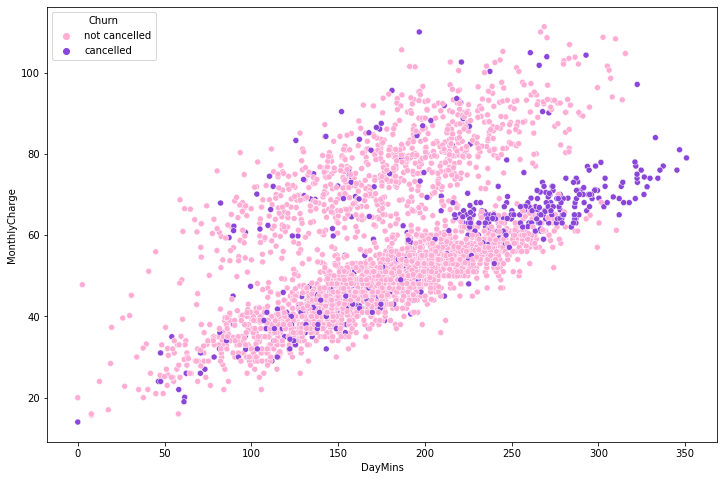

In [36]:
# Scatterplot: MonthlyCharge & DayMins & Churn

# Create scatterplot
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'DayMins', y = 'MonthlyCharge', hue = 'Churn', palette=["#ffadd5", "#8a45d9"])

plt.savefig("scatterplot_dayminsvsmonthlycharge.jpg")

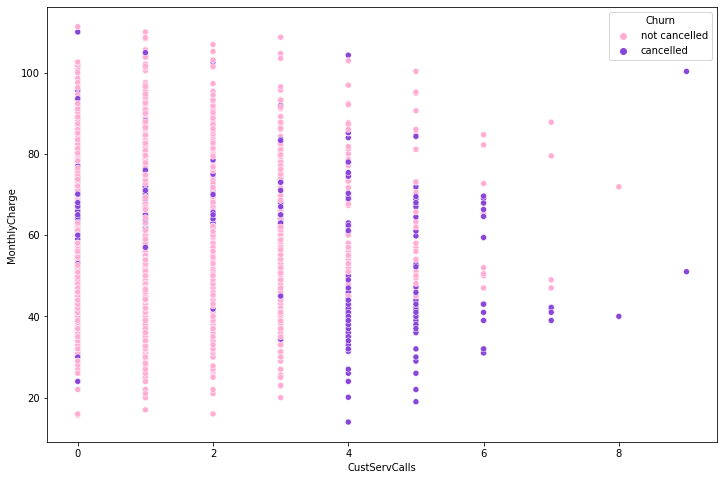

In [37]:
# Scatterplot: MonthlyCharge & CustServCalls & Churn

# Create scatterplot
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'CustServCalls', y = 'MonthlyCharge', hue = 'Churn', palette=["#ffadd5", "#8a45d9"])

plt.savefig("scatterplot_custcallsvsmonthlycharge.jpg")

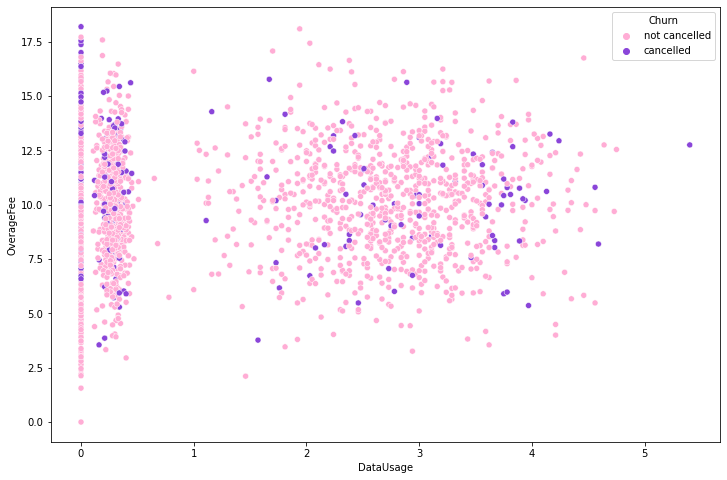

In [38]:
# Scatterplot: DataUsage & OverageFee & Churn

# Create scatterplot
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'DataUsage', y = 'OverageFee', hue = 'Churn', palette=["#ffadd5", "#8a45d9"])

plt.savefig("scatterplot_datausevsoveragefee.jpg")

<Figure size 432x288 with 0 Axes>

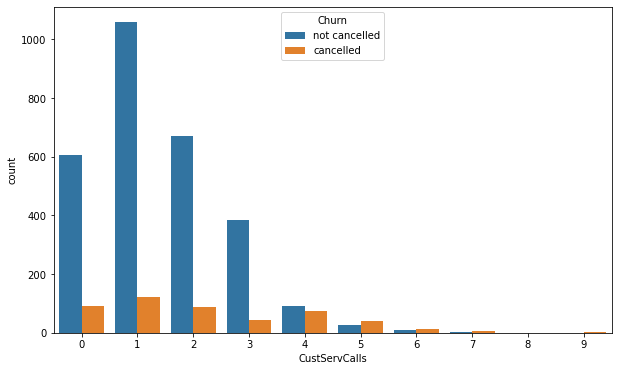

<Figure size 432x288 with 0 Axes>

In [39]:
# Barplot: CustServCalls & Churn

fig = plt.figure()  
plt.figure(figsize=(10,6))
ax = sns.countplot(data = df, x='CustServCalls', hue = 'Churn')
plt.show()

plt.savefig("barplot_custcalls.jpg")